<a href="https://colab.research.google.com/github/AlisAleksanyan/ILO-dataset/blob/master/BAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url="https://raw.githubusercontent.com/AlisAleksanyan/ILO-dataset/master/BA_dataset.csv"
data=pd.read_csv(url)

In [ ]:
new_data = data.rename(columns = {  "1. Managers (%)" : "Managers",
                                  "wb_income_group.label":"income group",
                                  "2. Professionals  (%)" : "Prof", 
                                  "3. Technicians and associate professionals (%)": "Tech",
                                  "4. Clerical support workers (%)": "Clericalsupp",
                                  "5. Service and sales workers (%)" : "Services",
                                  "7. Craft and related trades workers (%)" : "Craft",
                                  "8. Plant and machine operators, and assemblers (%)" : "Plant",
                                  "96. Elementary occupations and skilled agricultural, forestry and fishery workers (%)": "Elementary"})

       
                    

NameError: ignored

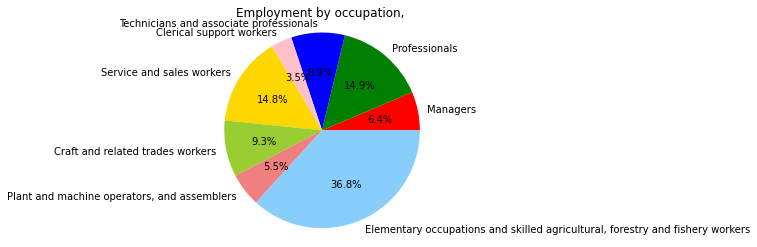

In [ ]:
labels = 'Managers', 'Professionals', 'Technicians and associate professionals', 'Clerical support workers', 'Service and sales workers', 'Craft and related trades workers', 'Plant and machine operators, and assemblers', 'Elementary occupations and skilled agricultural, forestry and fishery workers'
sizes = [6.369,	14.88,	8.855,	3.474,	14.8,	9.305,	5.526,	36.792]
colors = ['red', 'green','blue', 'pink','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie( sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Employment by occupation, ")
plt.axis('equal')
plt.show()

In [ ]:
data.pivot_table(columns='sex', values= 'Total employment (thousands)')

sex,Female,Male,Total
Total employment (thousands),500.894905,589.171952,1090.066762


In [ ]:
occ = pd.DataFrame (new_data, columns = ['sex','Total employment (thousands)','Managers','Prof','Tech','Clericalsupp','Services','Craft','Plant','Elementary'])

In [ ]:
gender_groups = occ.groupby('sex')
gender_groups['Total employment (thousands)'].mean()

Series([], Name: Total employment (thousands), dtype: float64)

In [ ]:
occ = occ[occ.sex != 'Total']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
dummy=pd.get_dummies(occ['sex'])
dummy.head()
occ=occ.merge(dummy, left_index=True, right_index=True)
occ.head()

,sex,Total employment (thousands),Managers,Prof,Tech,Clericalsupp,Services,Craft,Plant,Elementary
0,NaN,1084.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,597.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,487.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1087.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,595.649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
feature_cols = ['Managers', 'Prof', 'Tech', 'Clericalsupp','Services','Craft','Plant','Elementary']
X = occ[feature_cols] # Features
y = occ.Female # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#What to define instead of Female not to have a Perfect Separation?


In [ ]:
#Fully grown Decision Tree/ making dummes,separating X and Y, train test split
new_data=pd.get_dummies(data,drop_first=True)

X=new_data.drop('sex', axis=1)
Y=new_data.sex
X0, X1, Y0, Y1=train_test_split(X,Y, test_size=0.25, random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X0,Y0)
Y0_dt=dt.predict_proba(X0)[:,1]
Y1_dt=dt.predict_proba(X1)[:,1]
print("ROC_AUC Train for fully grown DT:",roc_auc_score(Y0,Y0_dt))
print("ROC_AUC Test for fully grown DT:",roc_auc_score(Y1,Y1_dt).round(2))

KeyError: ignored

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 0],
       [0, 6]])

In [ ]:
#Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


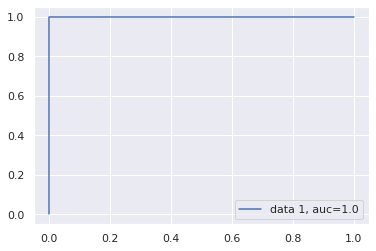

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#AUC score 1 represents perfect classifier

In [ ]:
url="https://raw.githubusercontent.com/AlisAleksanyan/ILO-dataset/master/emp_sex_ed_mar.csv"
emp=pd.read_csv(url)

In [ ]:
emp.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Armenia,"Employment by sex, education and marital statu...",ARM - LFS - Household Labour Force Survey,Sex: Male,Education (Aggregate levels): Basic,Marital status: Single / Widowed / Divorced,2014,13.3289,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
1,Armenia,"Employment by sex, education and marital statu...",ARM - LFS - Household Labour Force Survey,Sex: Male,Education (Aggregate levels): Basic,Marital status: Married / Union / Cohabiting,2014,17.8311,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
2,Armenia,"Employment by sex, education and marital statu...",ARM - LFS - Household Labour Force Survey,Sex: Male,Education (Aggregate levels): Intermediate,Marital status: Single / Widowed / Divorced,2014,76.8529,Break in series,Nonstandard education level: Including special...,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
3,Armenia,"Employment by sex, education and marital statu...",ARM - LFS - Household Labour Force Survey,Sex: Male,Education (Aggregate levels): Intermediate,Marital status: Married / Union / Cohabiting,2014,310.4144,Break in series,Nonstandard education level: Including special...,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
4,Armenia,"Employment by sex, education and marital statu...",ARM - LFS - Household Labour Force Survey,Sex: Male,Education (Aggregate levels): Advanced,Marital status: Single / Widowed / Divorced,2014,43.4209,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...


classif1.label
Education (Aggregate levels): Advanced            AxesSubplot(0.125,0.125;0.775x0.755)
Education (Aggregate levels): Basic               AxesSubplot(0.125,0.125;0.775x0.755)
Education (Aggregate levels): Intermediate        AxesSubplot(0.125,0.125;0.775x0.755)
Education (Aggregate levels): Less than basic     AxesSubplot(0.125,0.125;0.775x0.755)
Education (Aggregate levels): Level not stated    AxesSubplot(0.125,0.125;0.775x0.755)
Name: obs_value, dtype: object

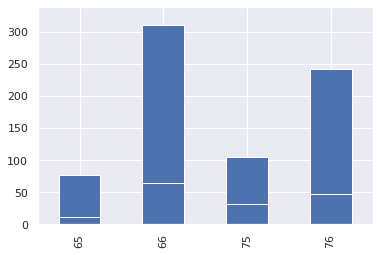

In [ ]:
emp.groupby('classif1.label').obs_value.plot.bar()


In [ ]:
#Labour Force Survey anonymised micro data
url="https://raw.githubusercontent.com/AlisAleksanyan/ILO-dataset/master/newdata%20.csv"
labor=pd.read_csv(url)

In [ ]:
labor.head()

,Unnamed: 0,X,A2,A3,A5,A7,A8,B3,Age,B7,B9,B11,B12,C2,C12,E2_9group,E4_21group,E6,E7,E9,E10,E13,E13_1,E14_1,E14_2,E14_Result,E16,E17,E22,E23,E24,G1_1,G1_2,Weights_1,WeightsCalib_1,Weights_Year,WeightsCalib_Year,resident,nonresident,LR_WAP,LF,PNLF,empj,underemployed,iempj,emsj,iemsj,LU1_unemployed,LU2_combined,LU3_potential,LU4_composite,long_term_unemployed
0,3,3,5,1,1,4,3,2,47,5,2,2,5,1,1,7,7,2,4,1,3,1.0,1.0,60000.0,0.0,1.0,4,1,1,7,1,48,0,615.423902,438.894863,150.459216,116.341876,1,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,23,8,1,1,2,2,1,50,7,2,2,5,1,1,7,6,2,4,3,3,1.0,1.0,150000.0,0.0,1.0,4,2,1,7,1,60,0,1271.876064,399.404989,310.949047,131.651302,1,NaN,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,40,4,2,1,5,4,1,30,6,2,2,5,1,1,3,10,3,4,3,3,1.0,2.0,200000.0,0.0,1.0,4,1,1,6,1,40,0,397.599701,434.704088,110.405818,92.060563,1,NaN,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,47,1,2,2,3,2,1,59,5,2,2,5,1,1,6,1,1,4,3,3,1.0,2.0,200000.0,0.0,1.0,4,1,4,7,1,35,0,259.213691,227.789774,62.440150,51.415515,1,NaN,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49,49,2,2,2,3,3,1,61,5,2,2,5,1,1,6,1,1,4,3,3,1.0,3.0,150000.0,0.0,1.0,4,1,4,7,2,28,0,259.213691,227.789774,62.440150,51.415515,1,NaN,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
